# Decision Trees

Another set of common classification algorithms are based on "Decision Trees". These are also intuitive and, more importantly, highly "visual".

In [30]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

Let's start with a simple example. Here are a few artificial datasets:

In [6]:
train_data = pd.DataFrame({
    'We had meat?':    [0, 0, 1, 1, 0, 1],
    'We had salad?':   [1, 0, 0, 1, 0, 1],
    'We had dessert?': [1, 0, 1, 0, 1, 1],
    'We had pasta?':   [1, 1, 1, 1, 0, 1],
    'We had wine?':    [0, 1, 0, 0, 1, 0],
    'Did we have a good time?': [0, 1, 0, 0, 1, 0]
}, index=['Monday', 'Tuesday', 'Wednesday',
          'Thursday', 'Friday', 'Saturday'],
    columns=['We had meat?', 'We had salad?', 'We had dessert?', 'We had pasta?',
             'We had wine?', 'Did we have a good time?'])


train_data

,We had meat?,We had salad?,We had dessert?,We had pasta?,We had wine?,Did we have a good time?
Monday,0,1,1,1,0,0
Tuesday,0,0,0,1,1,1
Wednesday,1,0,1,1,0,0
Thursday,1,1,0,1,0,0
Friday,0,0,1,0,1,1
Saturday,1,1,1,1,0,0


In [8]:
test_data = pd.DataFrame({
    'We had meat?':    [1, 0, 1],
    'We had salad?':   [0, 1, 1],
    'We had dessert?': [1, 0, 1],
    'We had pasta?':   [0, 1, 1],
    'We had wine?':    [1, 1, 0],
    'Did we have a good time?': [1, 1, 0]
}, columns=['We had meat?', 'We had salad?', 'We had dessert?',
            'We had pasta?', 'We had wine?', 'Did we have a good time?'])
test_data

,We had meat?,We had salad?,We had dessert?,We had pasta?,We had wine?,Did we have a good time?
0,1,0,1,0,1,1
1,0,1,0,1,1,1
2,1,1,1,1,0,0


In [11]:
X_train = train_data.drop(columns='Did we have a good time?')
X_train

,We had meat?,We had salad?,We had dessert?,We had pasta?,We had wine?
Monday,0,1,1,1,0
Tuesday,0,0,0,1,1
Wednesday,1,0,1,1,0
Thursday,1,1,0,1,0
Friday,0,0,1,0,1
Saturday,1,1,1,1,0


In [12]:
Y_train = train_data['Did we have a good time?'].to_frame()
Y_train

,Did we have a good time?
Monday,0
Tuesday,1
Wednesday,0
Thursday,0
Friday,1
Saturday,0


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
decisiontree = DecisionTreeClassifier()

In [14]:
decisiontree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
X_test = test_data.drop(columns='Did we have a good time?')
X_test

,We had meat?,We had salad?,We had dessert?,We had pasta?,We had wine?
0,1,0,1,0,1
1,0,1,0,1,1
2,1,1,1,1,0


In [17]:
Y_test = test_data['Did we have a good time?'].to_frame()
Y_test

,Did we have a good time?
0,1
1,1
2,0


In [18]:
decisiontree.predict(X_test)

array([1, 1, 0])

**It worked perfectly!**

In [19]:
decisiontree.score(X_test, Y_test)

1.0

To further analyze the workings of the tree we can create a graphviz visualization of it. The following helper function will aid us on this task. (Note: this doesn't work on Azure).

In [20]:
from sklearn import tree
from graphviz import Source

def plottree(decisiontree, features_names=None, class_names=None, out_file=None):
    """Returns a graphviz visualization of a scikit-learn decision tree
    
    Inputs
        - decisiontree: tree to visualize
        - feature_names: iterable with the names of the features present in the data.
        - class_names: iterable with the names of the classes present in the data, in increasing order.
        
    If the call to this function is the last line of a notebook cell, the tree is rendered automatically.
    """
    dot_data = tree.export_graphviz(
        decisiontree, 
        out_file=out_file, 
        filled=True, 
        rounded=True, 
        rotate=True,
        feature_names=features_names,
        class_names=class_names
    )
    return Source(dot_data)

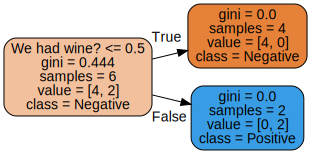

In [22]:
plottree(decisiontree, features_names=X_train.columns, class_names=["Negative", "Positive"])

We can see that the tree is made up of a root node, where the split is made in one of the variables at value 0.5. Before this split the Gini impurity is 0.5, as we have one pattern from each class. After this split we obtain two leaf nodes with 0 impurity, each of them containing a single pattern from either class.

## Applying Decision Trees to Iris

In [24]:
iris = datasets.load_iris()

In [46]:
iris_df = pd.DataFrame(
    data=np.c_[iris.data, iris.target],
    columns=iris.feature_names + ['target'])

iris_df['Species'] = pd.Series(iris.target_names).take(iris.target).values
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.4, random_state=10)

In [62]:
dt = DecisionTreeClassifier()

In [63]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
dt.score(X_test, y_test)

0.9166666666666666

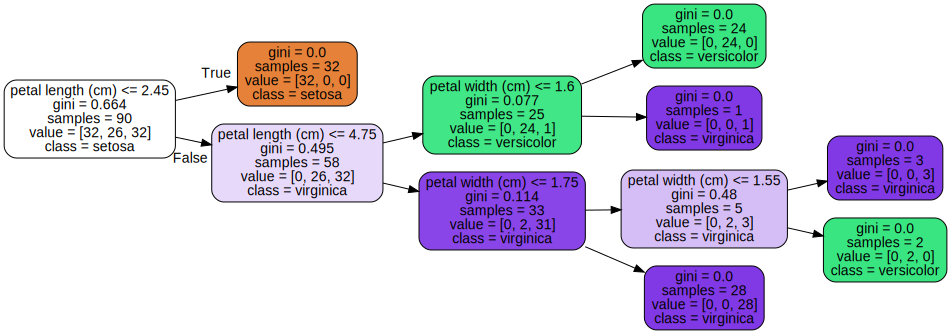

In [39]:
plottree(dt, features_names=iris.feature_names, class_names=iris.target_names)

### Breaking up the tree

The tree is created by those patterns that will explain "most" of the results. Let's restrict the options to only one decision and plot it again:

Tree accuracy is 0.6


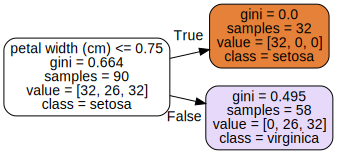

In [43]:
smalltree = DecisionTreeClassifier(max_depth=1)
smalltree.fit(X_train, y_train)

print('Tree accuracy is {}'.format(smalltree.score(X_test, y_test)))

plottree(smalltree, features_names=iris.feature_names, class_names=iris.target_names)

In [53]:
iris_df['Species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

In [50]:
iris_df[iris_df['petal width (cm)'] < .75]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa


In [52]:
len(iris_df[iris_df['petal width (cm)'] < .75])

50

### Second step

Tree accuracy is 0.9333333333333333


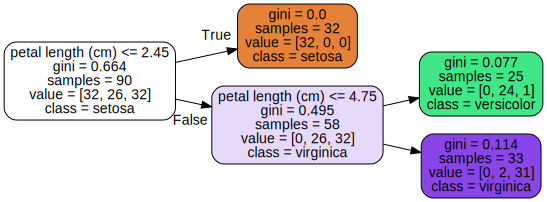

In [54]:
smalltree = DecisionTreeClassifier(max_depth=2)
smalltree.fit(X_train, y_train)

print('Tree accuracy is {}'.format(smalltree.score(X_test, y_test)))

plottree(smalltree, features_names=iris.feature_names, class_names=iris.target_names)

In [56]:
not_setosas = iris_df[iris_df['petal width (cm)'] >= .75]
not_setosas['Species'].value_counts()

versicolor    50
virginica     50
Name: Species, dtype: int64

In [57]:
not_setosas[not_setosas['petal length (cm)'] <= 4.75]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
50,7.0,3.2,4.7,1.4,1.0,versicolor
51,6.4,3.2,4.5,1.5,1.0,versicolor
53,5.5,2.3,4.0,1.3,1.0,versicolor
54,6.5,2.8,4.6,1.5,1.0,versicolor
55,5.7,2.8,4.5,1.3,1.0,versicolor
56,6.3,3.3,4.7,1.6,1.0,versicolor
57,4.9,2.4,3.3,1.0,1.0,versicolor
58,6.6,2.9,4.6,1.3,1.0,versicolor
59,5.2,2.7,3.9,1.4,1.0,versicolor
60,5.0,2.0,3.5,1.0,1.0,versicolor


In [59]:
not_setosas.loc[not_setosas['petal length (cm)'] <= 4.75, 'Species'].value_counts()

versicolor    44
virginica      1
Name: Species, dtype: int64

In [60]:
not_setosas.loc[not_setosas['petal length (cm)'] > 4.75, 'Species'].value_counts()

virginica     49
versicolor     6
Name: Species, dtype: int64

### The problem of overfitting

If you check our previous examples, you'll see that the model that with only `max_depth=2` performed better (93%) than the model without `max_depth` (91%). That means that, to put it simple, more "liberty" hurts the model. That's because Decision Trees are prone to overfitting.

To prevent that, we can use some parameters of DecisionTrees that are available to _"pre-prune"_ the tree, and thus, avoid overfitting:


* **max_depth**: maximum depth at which the tree can continue creating splits.
* **min_samples_split**: the minimum number of samples required to split an internal node.
* **min_samples_leaf**: the minimum number of samples required to be at a leaf node.
* **max_leaf_nodes**: the maximum number of leaf (terminal) nodes that are allowed in the tree.
* **min_impurity_decrease**: a node will be split only if the split induces a decrease of the impurity greater than or equal to this value.

You can check these parameters in the `DecisionTreeClassifier` constructor:

In [72]:
DecisionTreeClassifier?

These parameters are usually set with an independent validation set or some kind of cross-validation procedure. Here we will use a cross-validation strategy over the training set to test a range of different pre-pruning strategies. We will do so using the **GridSearchCV** class:

In [73]:
from sklearn.model_selection import GridSearchCV

We'll generate a few different options for the parameters and tests the best outputs:

In [74]:
param_grid = {
    'max_depth': [1, 2, 3, 4],
    'min_samples_split': [ 2, 5, 10, 20],
    'min_samples_leaf': [2, 5, 10, 20],
    'max_leaf_nodes': [2, 5, 10, 20],
    'min_impurity_decrease': [1e-3, 1e-2, 1e-1]
}

Now we run a **GridSearchCV crossvalidation** to find the best pre-pruned tree over the training data, using the grid of parameters above.

Check the docs to understand how this can be done.

- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

As a result of this cell you should have a fitted GridSearchCV model for a DecisionTreeClassifier under the variable treesearch.

In [81]:
treesearch = GridSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_grid=param_grid,
    cv=5,
    verbose=0
)

treesearch.fit(iris.data, iris.target)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [2, 5, 10, 20], 'max_leaf_nodes': [2, 5, 10, 20], 'min_impurity_decrease': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
treesearch.best_score_

0.96

In [83]:
treesearch.best_params_

{'max_depth': 2,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [77]:
treesearch.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
treesearch.best_estimator_.score(X_test, y_test)

0.9833333333333333